# (16) Rebuttal Fig -- Sim (```GABAN```)

**Motivation**:

<br>

In [1]:
# HIDE CODE


import os, sys
from IPython.display import display

# tmp & extras dir
git_dir = os.path.join(os.environ['HOME'], 'Dropbox/git')
extras_dir = os.path.join(git_dir, 'jb-Ca-fMRI/_extras')
fig_base_dir = os.path.join(git_dir, 'jb-Ca-fMRI/figs')
tmp_dir = os.path.join(git_dir, 'jb-Ca-fMRI/tmp')

# GitHub
sys.path.insert(0, os.path.join(tmp_dir, '_Ca-fMRI-Feb11'))
from figures.fighelper import *
from analysis.final import *
from utils.render import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from tqdm.notebook import tqdm
%matplotlib inline
set_style()

## Prepare

In [2]:
mice = Mice(512)
kws_show = show_kws(7)
kws_show['figsize_x'] = 5.0

translation = {'BOLD': BOLD, 'CAS': CAS, 'CAF': CAF}
kws_fig = dict(bbox_inches='tight', dpi=300, transparent=True)
fig_dir = pjoin(fig_base_dir, 'rebuttal', 'memberships')
print(fig_dir)

/home/hadi/Dropbox/git/jb-Ca-fMRI/figs/rebuttal/memberships

In [3]:
%%time

results = similiarity_results(
    mice=mice,
    perc=15,
    num_k=7,
    merge_thres=0.444,
    n_resamples=int(1e4),
)
bt = BootStrap(**results['props_ca'])
list(results)

CPU times: user 4min 10s, sys: 1min 11s, total: 5min 22s
Wall time: 5min 22s


[
    'bt_dict',
    'props_bo',
    'props_ca',
    'pi_sorted',
    'sim',
    'sim_overall',
    'sim_b',
    'sim_overall_b',
    'good_runs',
    'sim_run',
    'sim_run_overall',
    'tests',
    'tests_overall'
]

## Save results

In [4]:
selected = [
    'sim', 'sim_overall',
    'sim_b', 'sim_overall_b',
]
save_obj(
    obj= {k: results.get(k) for k in selected},
    file_name='cossim_gaban',
    save_dir=tmp_dir,
    mode='npy',
);

[PROGRESS] 'cossim_gaban.npy' saved at
/home/hadi/Dropbox/git/jb-Ca-fMRI/tmp

## Show fig

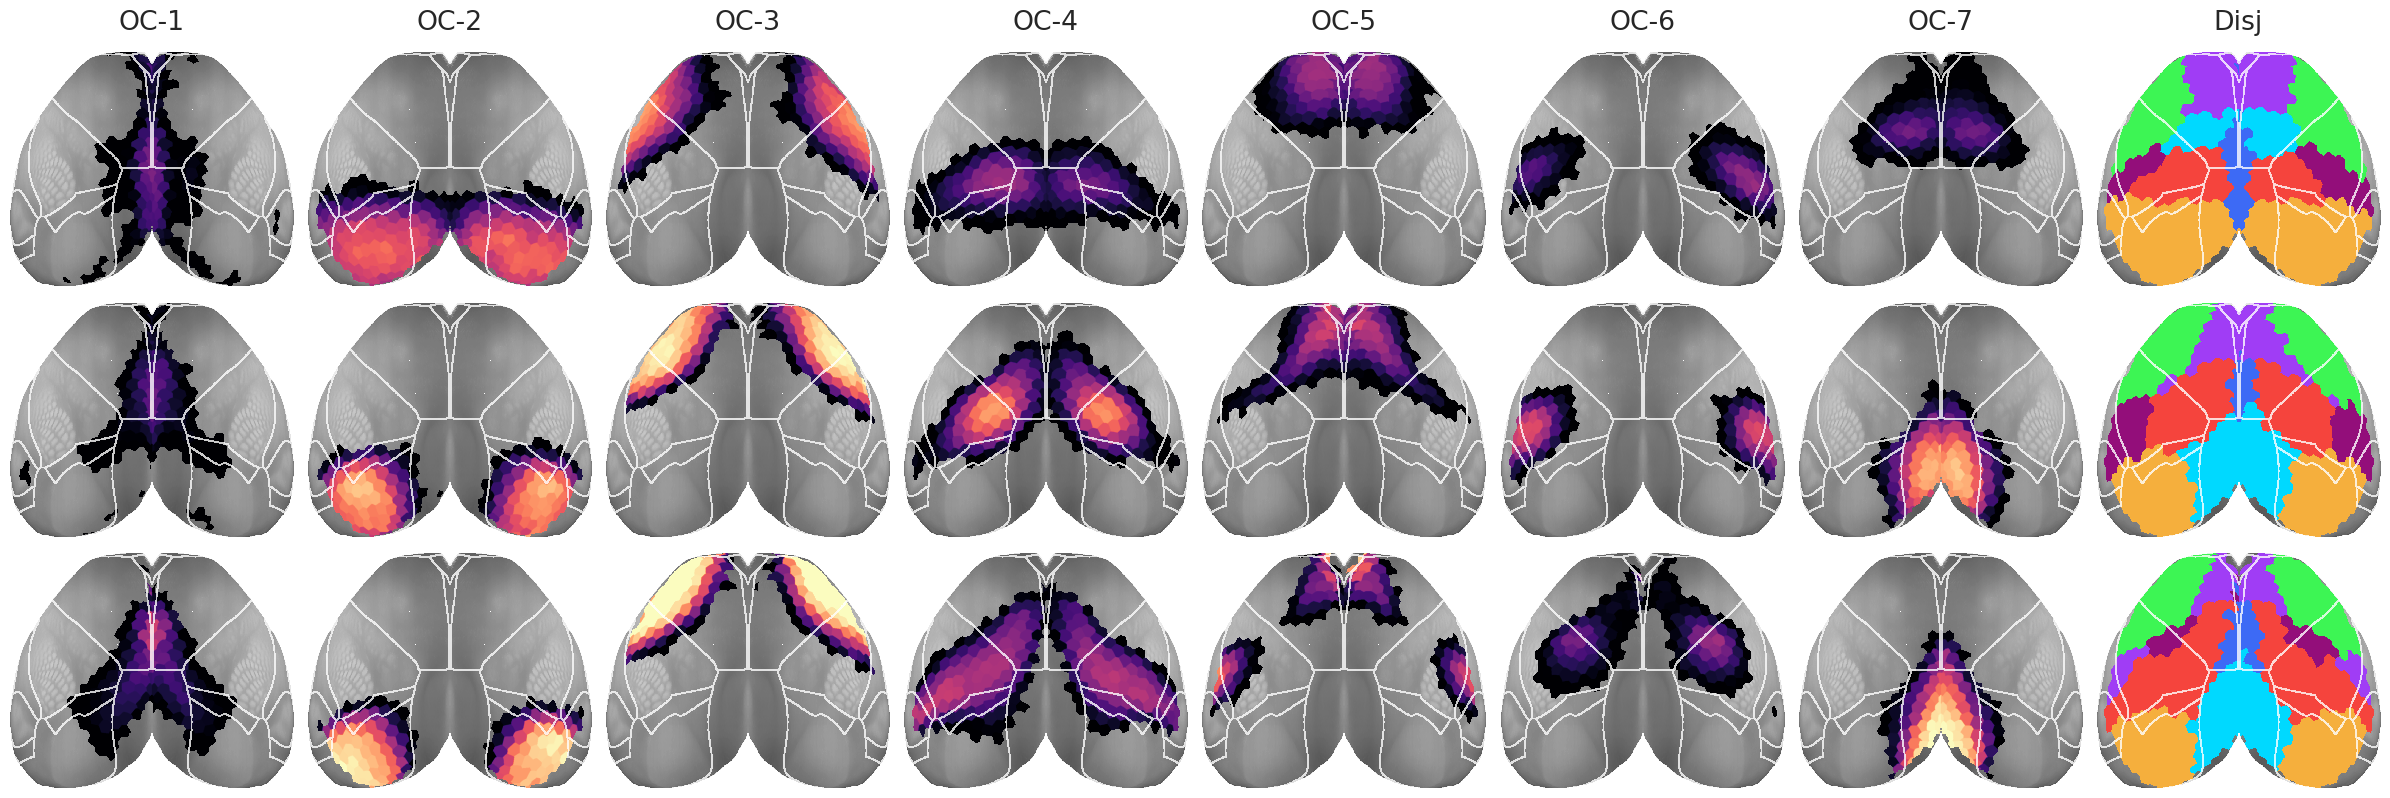

CPU times: user 45.3 s, sys: 584 ms, total: 45.8 s
Wall time: 45.9 s


In [5]:
%%time

_ = bt.show(results['pi_sorted'], **kws_show)